<a href="https://colab.research.google.com/github/santoshkimandi/Dissertation_RMSE_CURVE/blob/main/Predicting_Diabetes_using_Machine_Learning_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cloning the github Repository

In [1]:
!git clone https://github.com/santoshkimandi/Dissertation-Dataset

Cloning into 'Dissertation-Dataset'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (6/6), 685.83 KiB | 2.48 MiB/s, done.


Loading the data

In [2]:
# Read csv file using pandas
import pandas as pd
filename ="Dissertation-Dataset/diabetes_prediction_dataset.csv"
df = pd.read_csv(filename)
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


Exploratory Data Analysis

In [3]:
# quick look into data
print(df.head())

   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


In [4]:
print(df.shape)

(100000, 9)


In [5]:
print(df.describe())

                 age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.636783   
min         0.080000       0.00000       0.000000      10.010000   
25%        24.000000       0.00000       0.000000      23.630000   
50%        43.000000       0.00000       0.000000      27.320000   
75%        60.000000       0.00000       0.000000      29.580000   
max        80.000000       1.00000       1.000000      95.690000   

         HbA1c_level  blood_glucose_level       diabetes  
count  100000.000000        100000.000000  100000.000000  
mean        5.527507           138.058060       0.085000  
std         1.070672            40.708136       0.278883  
min         3.500000            80.000000       0.000000  
25%         4.800000           100.000000       0.000000  
50%         5.800000           14

In [6]:
print(df.columns)

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')


In [7]:
print(df.dtypes)

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object


In [8]:
# checking missing values in variables
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

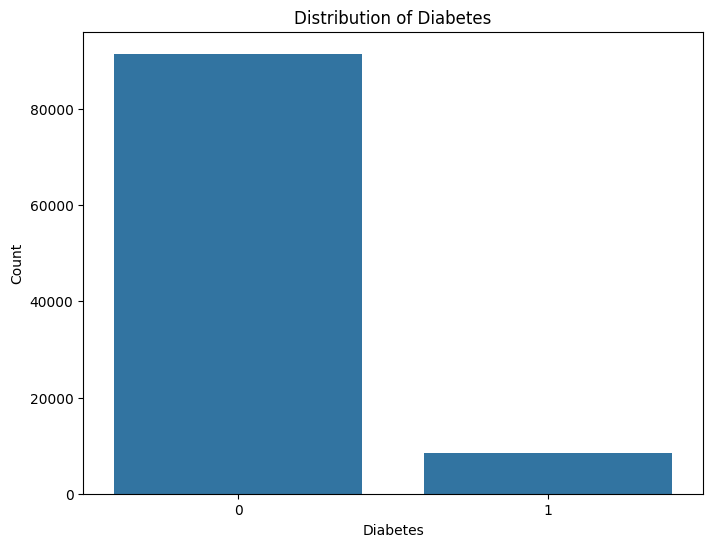

In [9]:
# Distribution of Target Variable (Diabetes)
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.countplot(x='diabetes', data=df)
plt.title('Distribution of Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.show()

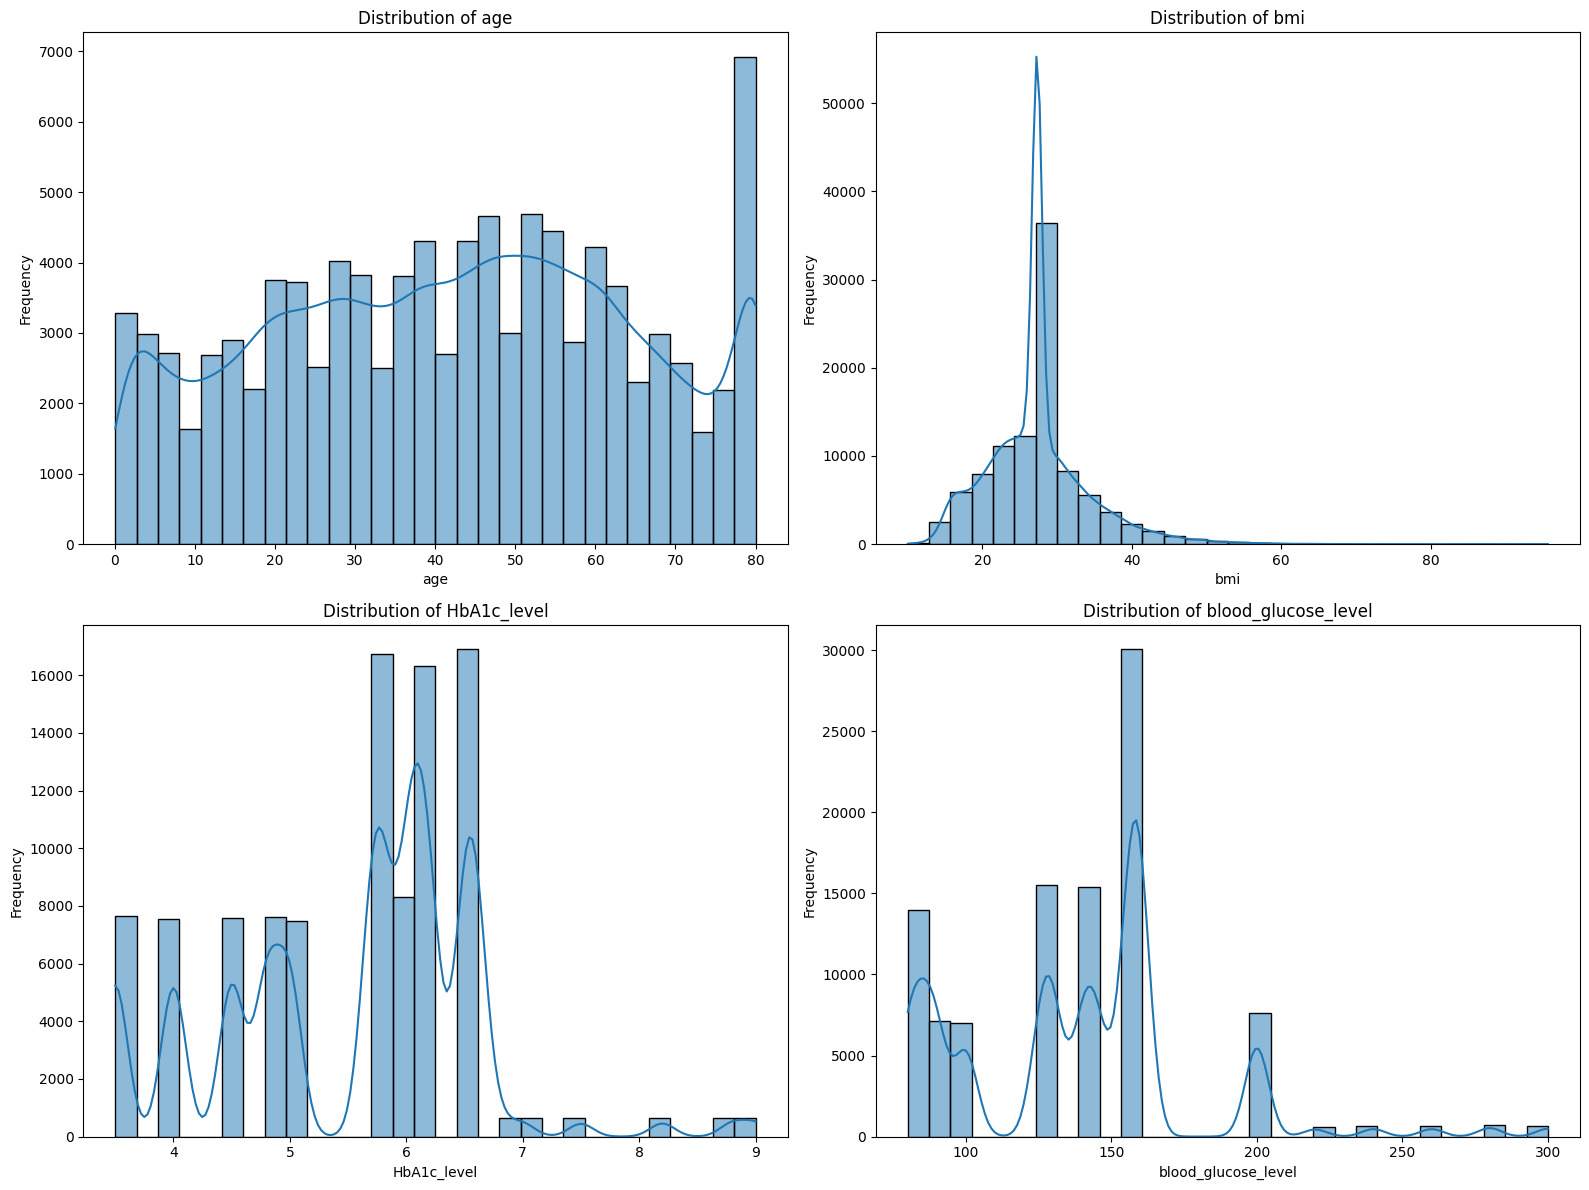

In [10]:
# Distribution of Numerical Features
plt.figure(figsize=(16, 12))

numerical_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

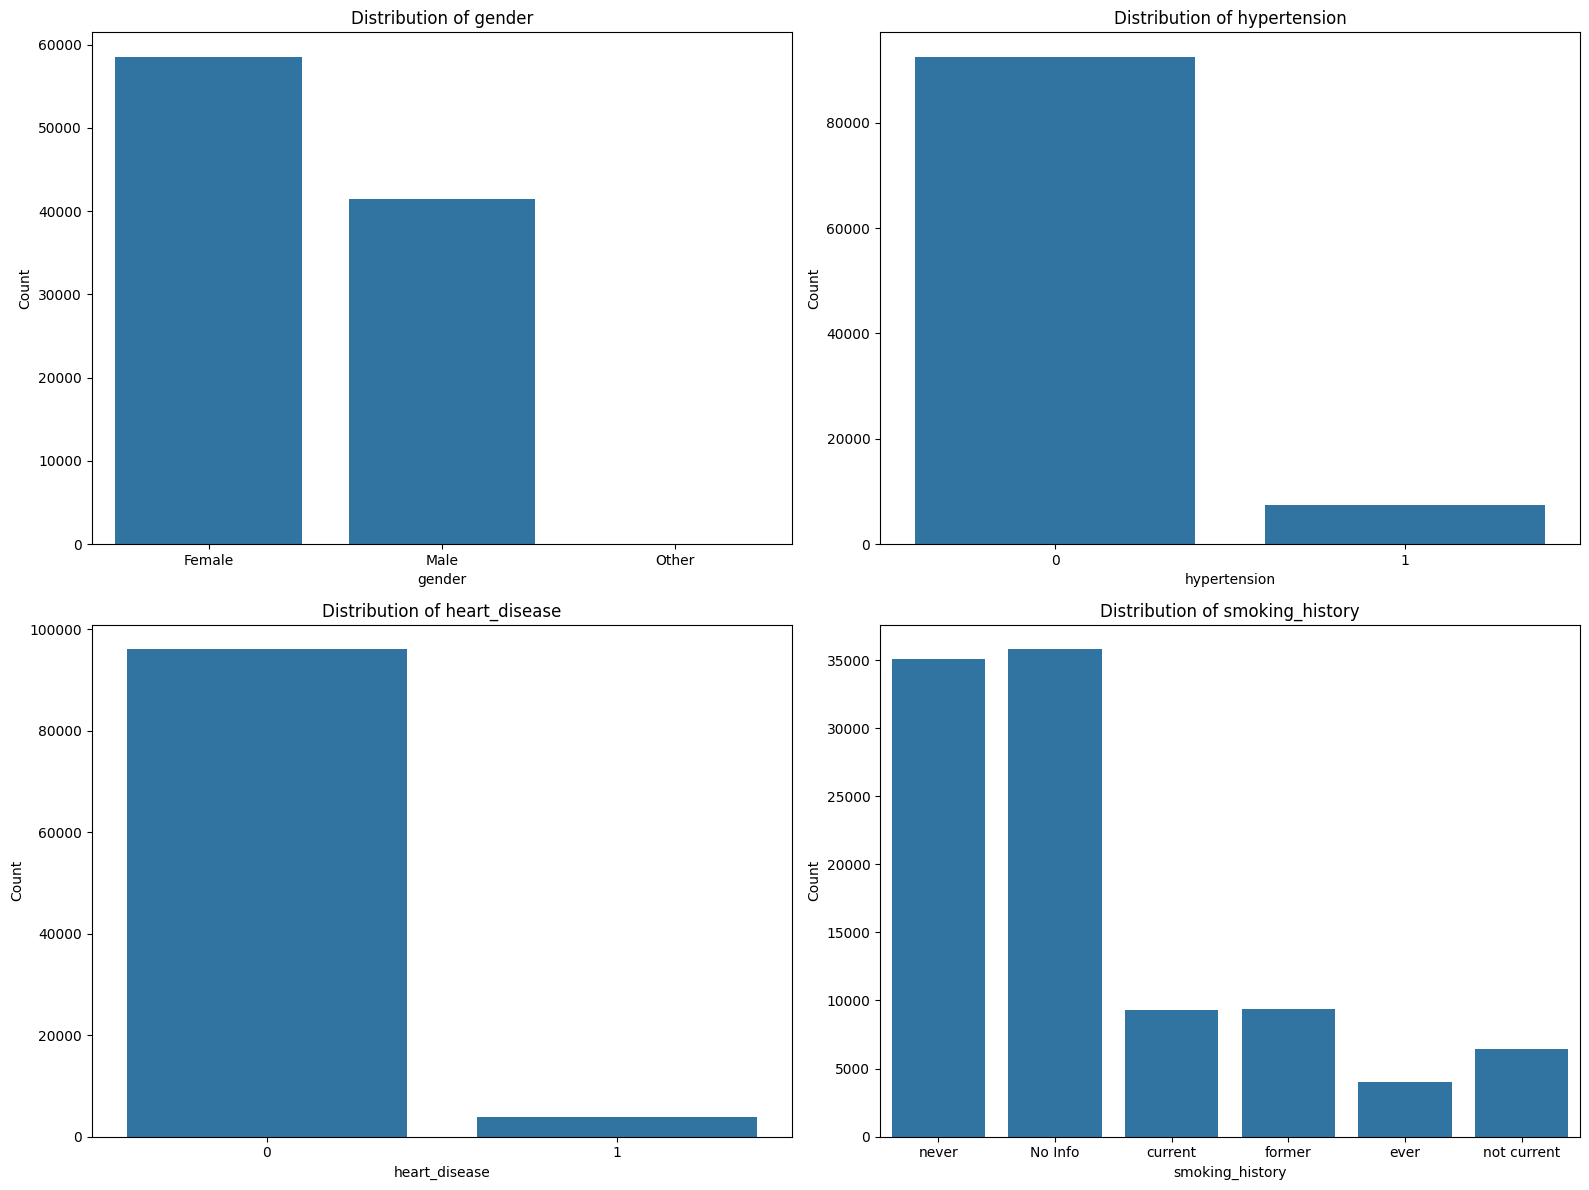

In [11]:
# Analyze Categorical Features
plt.figure(figsize=(16, 12))

categorical_features = ['gender', 'hypertension', 'heart_disease', 'smoking_history']

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=feature, data=df)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

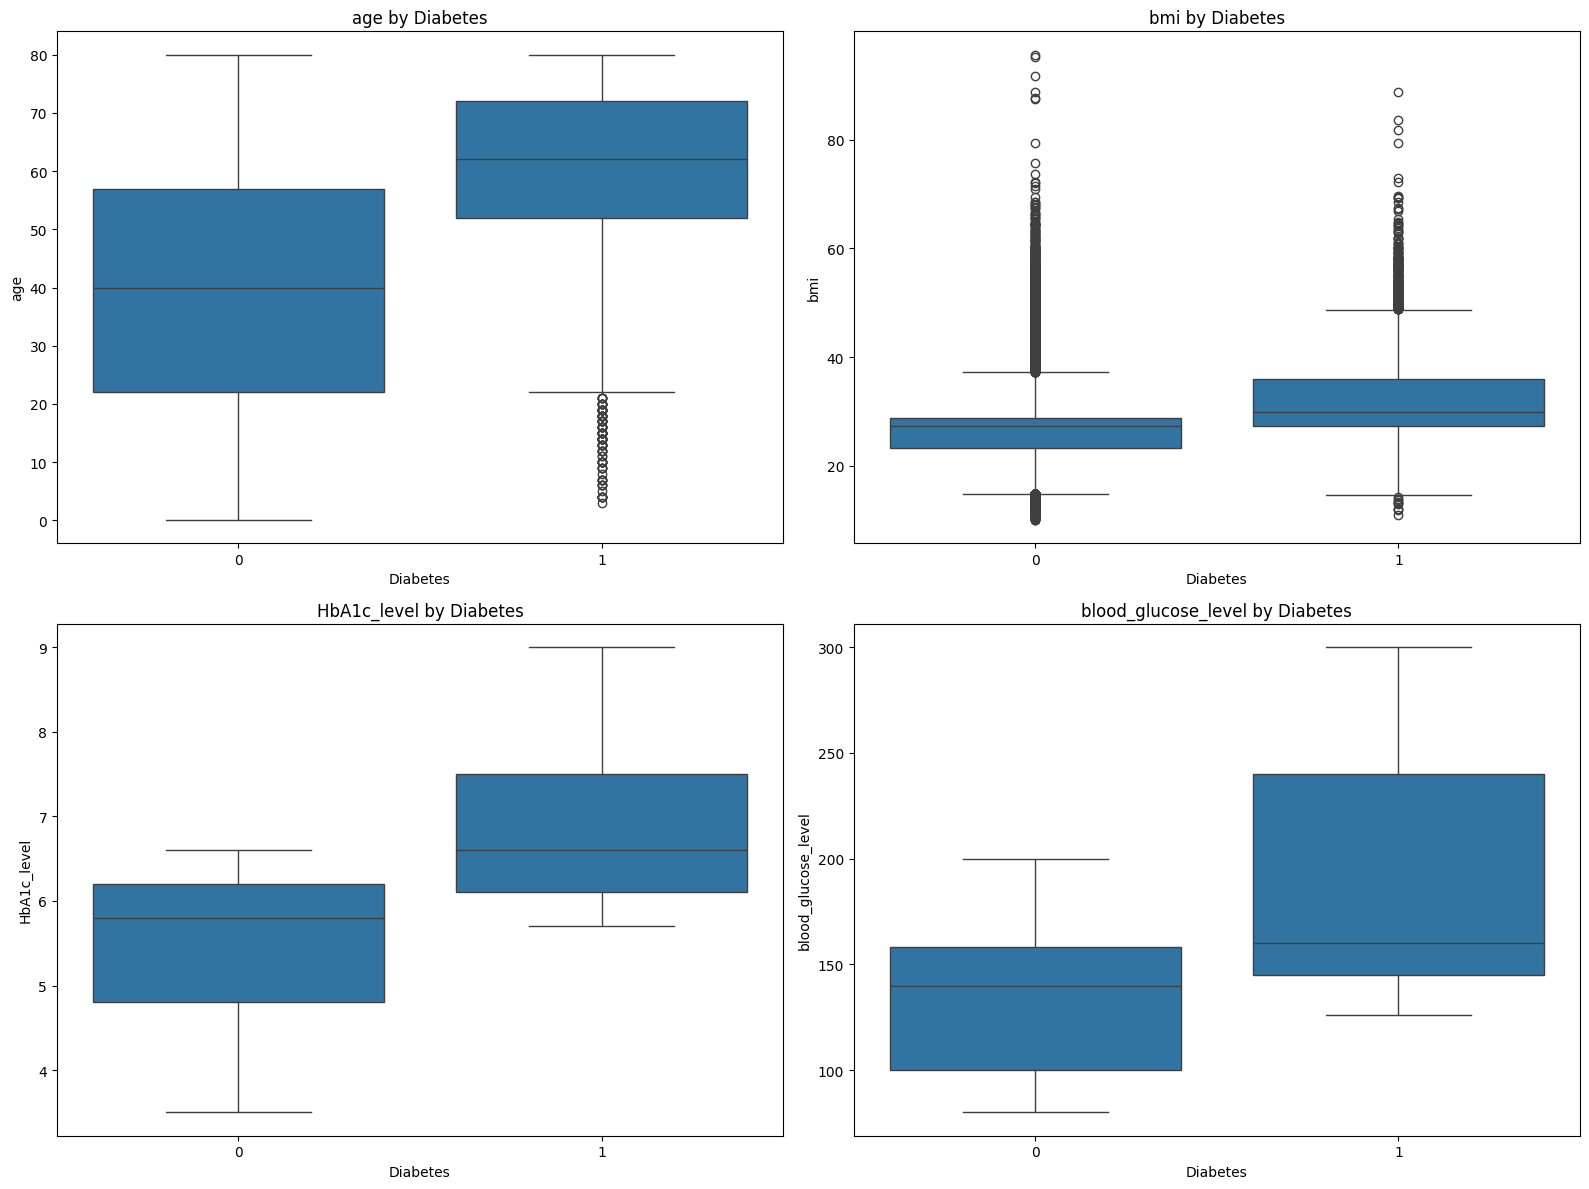

In [12]:
# Relationships Between Features and the Target Variable
# Numerical Features vs. Diabetes
plt.figure(figsize=(16, 12))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='diabetes', y=feature, data=df)
    plt.title(f'{feature} by Diabetes')
    plt.xlabel('Diabetes')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

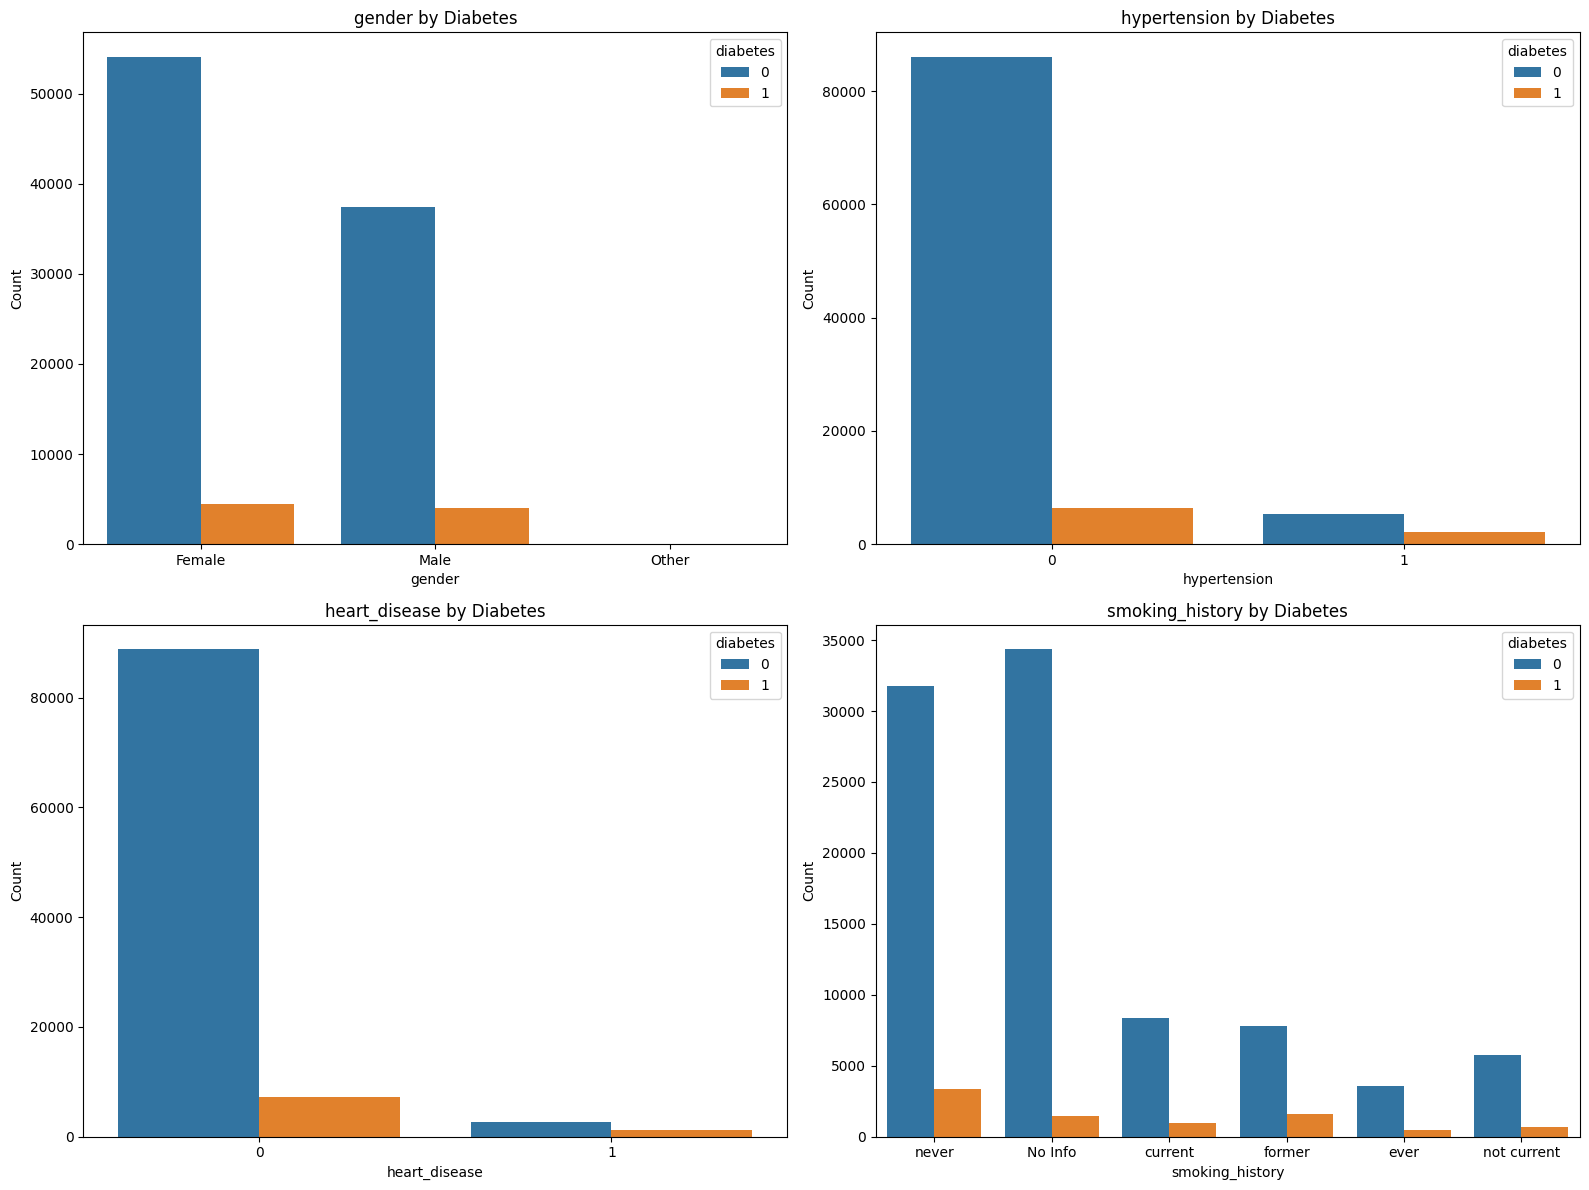

In [13]:
# Categorical Features vs. Diabetes
plt.figure(figsize=(16, 12))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=feature, hue='diabetes', data=df)
    plt.title(f'{feature} by Diabetes')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [14]:
# Imputation with Mode
# Ensure 'No Info' values are consistent
df['smoking_history'] = df['smoking_history'].str.strip()

# Recalculate mode in case it has changed
mode_smoking_history = df[df['smoking_history'] != 'No Info']['smoking_history'].mode()[0]

# Replace 'No Info' values
df['smoking_history'] = df['smoking_history'].replace('No Info', mode_smoking_history)

# Verify the replacement
print(df['smoking_history'].value_counts())
print(df['smoking_history'].unique())

smoking_history
never          70911
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64
['never' 'current' 'former' 'ever' 'not current']


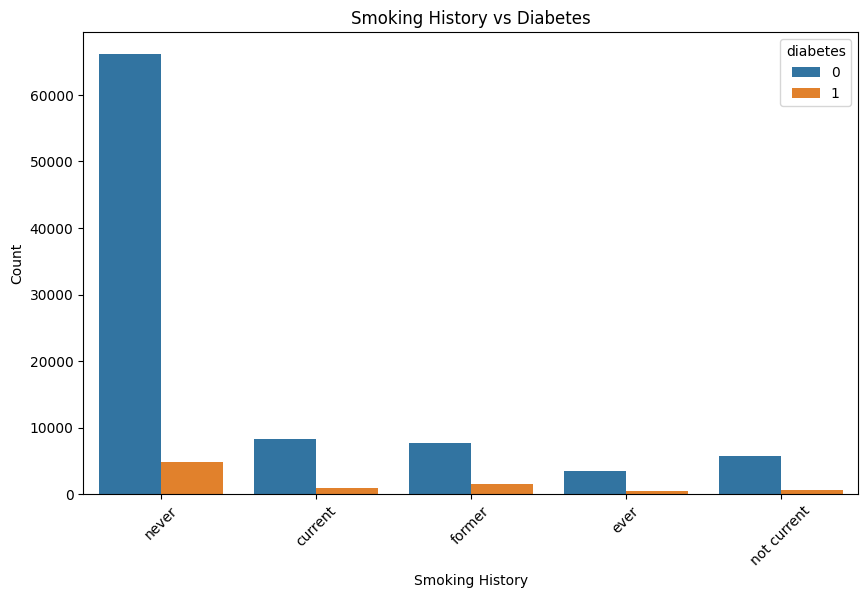

In [15]:
# Plot smoking history vs diabetes
plt.figure(figsize=(10, 6))
sns.countplot(x='smoking_history', hue='diabetes', data=df)
plt.title('Smoking History vs Diabetes')
plt.xlabel('Smoking History')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [16]:
# Feature Engineering
# Create a new feature: Age Group
df['age_group'] = pd.cut(df['age'], bins=[0, 18, 35, 50, 65, 80], labels=['0-18', '19-35', '36-50', '51-65', '66-80'])

# Handle outliers in BMI by capping the values at the 1st and 99th percentiles
Q1 = df['bmi'].quantile(0.01)
Q99 = df['bmi'].quantile(0.99)
df['bmi'] = df['bmi'].clip(Q1, Q99)

# Interaction feature between age and bmi
df['age_bmi_interaction'] = df['age'] * df['bmi']


In [17]:
# Define features and target
X = df.drop('diabetes', axis=1)
y = df['diabetes']

In [18]:
# List of numerical and categorical features
numerical_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'age_bmi_interaction']
categorical_features = ['gender', 'smoking_history', 'hypertension', 'heart_disease', 'age_group']

In [19]:
# Preprocessing for numerical data
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [20]:
# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply preprocessing
X_preprocessed = preprocessor.fit_transform(X)

# Extract the new feature names for the one-hot encoded features
cat_features = preprocessor.transformers_[1][1].get_feature_names_out(categorical_features)
all_features = numerical_features + list(cat_features)

# Create a DataFrame with the preprocessed data
X_preprocessed_df = pd.DataFrame(X_preprocessed, columns=all_features)

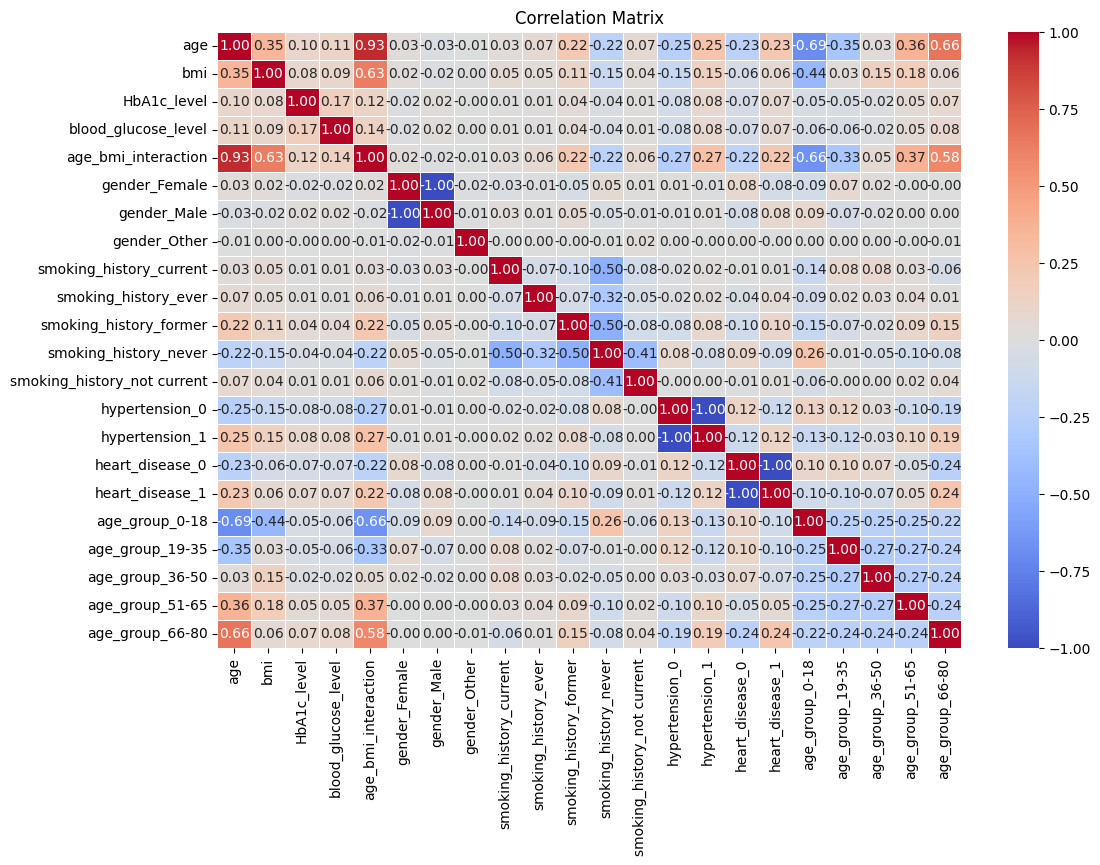

In [21]:
# Compute the correlation matrix
correlation_matrix = X_preprocessed_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Balance the dataset

diabetes
0    8500
1    8500
Name: count, dtype: int64


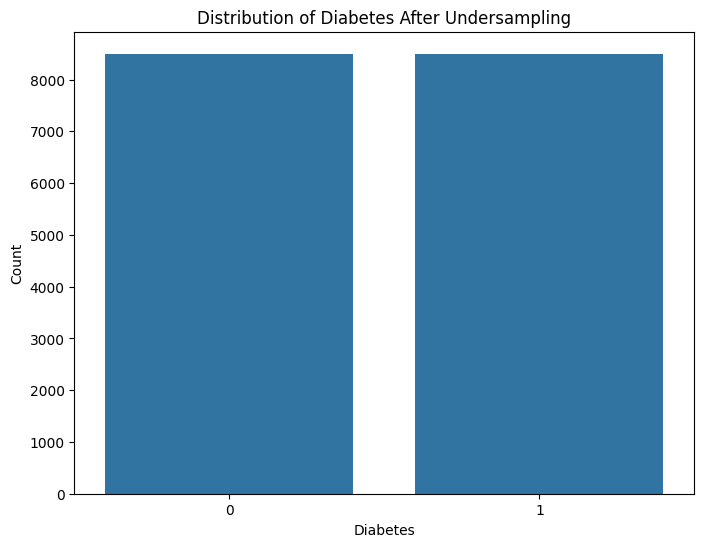

In [22]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df[df.diabetes == 0]
df_minority = df[df.diabetes == 1]

# Downsample majority class
df_majority_downsampled = resample(df_majority,
                                   replace=False,    # sample without replacement
                                   n_samples=len(df_minority),  # to match minority class
                                   random_state=123)  # reproducible results

# Combine minority class with downsampled majority class
df_balanced = pd.concat([df_majority_downsampled, df_minority])

# Display new class counts
print(df_balanced.diabetes.value_counts())

# Define features and target for the balanced dataset
X_balanced = df_balanced.drop('diabetes', axis=1)
y_balanced = df_balanced['diabetes']

# Apply preprocessing to the balanced data
X_balanced_preprocessed = preprocessor.fit_transform(X_balanced)

# Extract the new feature names for the one-hot encoded features
cat_features = preprocessor.transformers_[1][1].get_feature_names_out(categorical_features)
all_features = numerical_features + list(cat_features)

# Convert the balanced data into a DataFrame for better readability
X_balanced_df = pd.DataFrame(X_balanced_preprocessed, columns=all_features)

# Plot the distribution of the target variable after undersampling
plt.figure(figsize=(8, 6))
sns.countplot(x=y_balanced)
plt.title('Distribution of Diabetes After Undersampling')
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.show()

In [23]:
from sklearn.model_selection import train_test_split

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_balanced_preprocessed, y_balanced, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (13600, 22)
X_test shape: (3400, 22)
y_train shape: (13600,)
y_test shape: (3400,)


**Classification Algorithms:**

Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, mean_squared_error
import numpy as np

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the model with increased max_iter and a different solver (if needed)
logistic_regression_model = LogisticRegression(max_iter=1000, solver='lbfgs')  # 'lbfgs' is the default solver

# Initialize the model
logistic_regression_model = LogisticRegression()

# Train the model
logistic_regression_model.fit(X_train, y_train)

# Make predictions
y_pred = logistic_regression_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
lg_report = classification_report(y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the results
print("Logistic Regression Model")
print("Accuracy:", accuracy)
print("Classification Report:\n", lg_report)
print("RMSE:", rmse)

Logistic Regression Model
Accuracy: 0.8902941176470588
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89      1687
           1       0.90      0.88      0.89      1713

    accuracy                           0.89      3400
   macro avg       0.89      0.89      0.89      3400
weighted avg       0.89      0.89      0.89      3400

RMSE: 0.3312187832127598


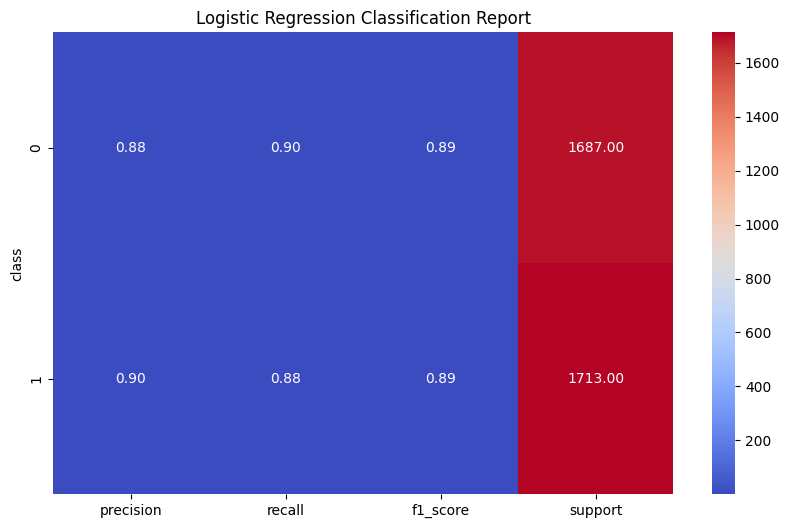

In [29]:
# Function to plot the classification report as a heatmap
def plot_classification_report(report, title):
    report_data = []
    lines = report.split('\n')
    for line in lines[2:-3]:
        row_data = line.split()
        if len(row_data) == 0 or len(row_data) < 5:  # skip empty lines or malformed lines
            continue
        row = {}
        row['class'] = row_data[0]
        row['precision'] = float(row_data[1])
        row['recall'] = float(row_data[2])
        row['f1_score'] = float(row_data[3])
        row['support'] = int(row_data[4])
        report_data.append(row)
    dataframe = pd.DataFrame.from_dict(report_data)
    dataframe.set_index('class', inplace=True)
    plt.figure(figsize=(10, 6))
    sns.heatmap(dataframe, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(title)
    plt.show()

# Plotting the classification report
plot_classification_report(lg_report, 'Logistic Regression Classification Report')

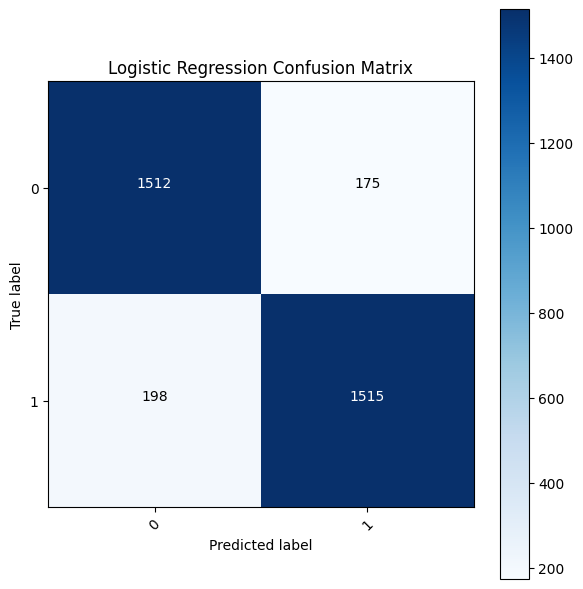

In [30]:
import itertools
# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, title):
    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation='nearest', cmap='Blues')
    plt.title(title)
    plt.colorbar()
    tick_marks = range(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()


# Plotting the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=[0, 1], title='Logistic Regression Confusion Matrix')


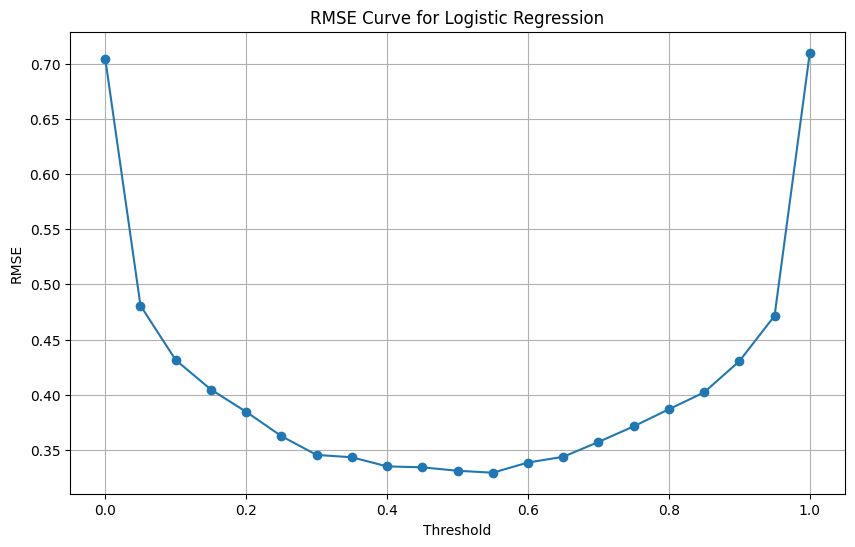

In [31]:
from sklearn.metrics import mean_squared_error

# Predict probabilities
y_prob = logistic_regression_model.predict_proba(X_test)[:, 1]

# Define thresholds
thresholds = np.arange(0.0, 1.05, 0.05)
rmse_values = []

# Calculate RMSE for each threshold
for threshold in thresholds:
    y_pred_threshold = (y_prob >= threshold).astype(int)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_threshold))
    rmse_values.append(rmse)

# Plot RMSE curve
plt.figure(figsize=(10, 6))
plt.plot(thresholds, rmse_values, marker='o')
plt.title('RMSE Curve for Logistic Regression')
plt.xlabel('Threshold')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()

Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
decision_tree_model = DecisionTreeClassifier()

# Train the model
decision_tree_model.fit(X_train, y_train)

# Make predictions
y_pred = decision_tree_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
dtree_report = classification_report(y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the results
print("Decision Tree Model")
print("Accuracy:", accuracy)
print("Classification Report:\n", dtree_report)
print("RMSE:", rmse)

Decision Tree Model
Accuracy: 0.8767647058823529
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88      1687
           1       0.88      0.88      0.88      1713

    accuracy                           0.88      3400
   macro avg       0.88      0.88      0.88      3400
weighted avg       0.88      0.88      0.88      3400

RMSE: 0.35104884862031244


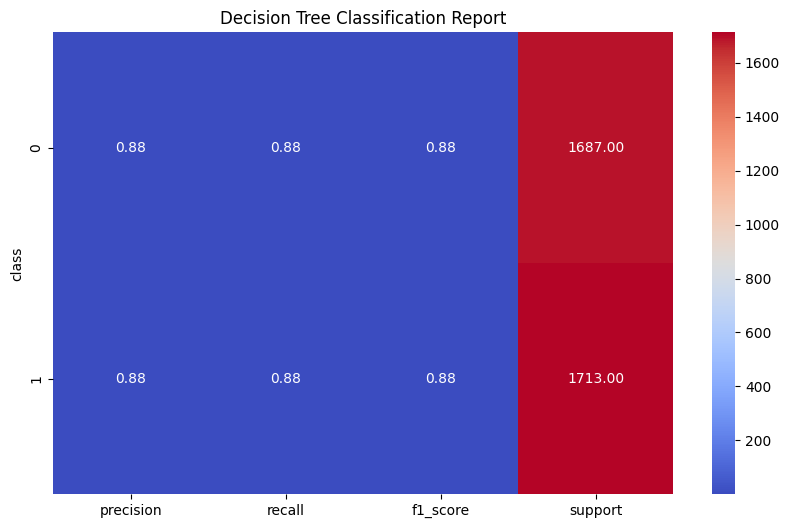

In [33]:
plot_classification_report(dtree_report, 'Decision Tree Classification Report')

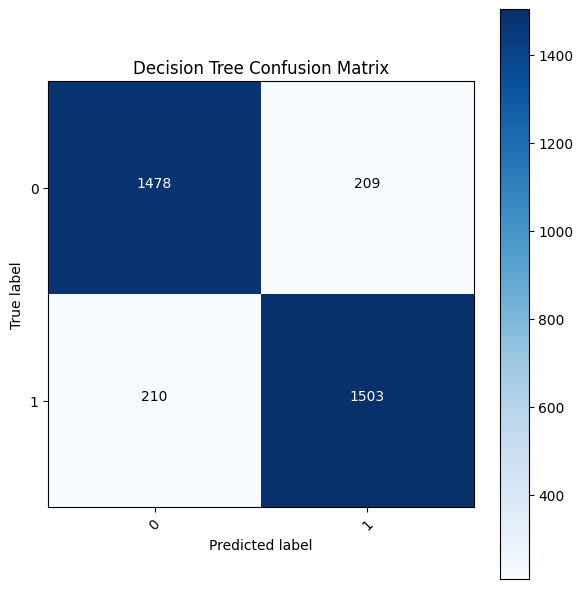

In [34]:
# Plotting the confusion matrix for Decision Tree
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=[0, 1], title='Decision Tree Confusion Matrix')

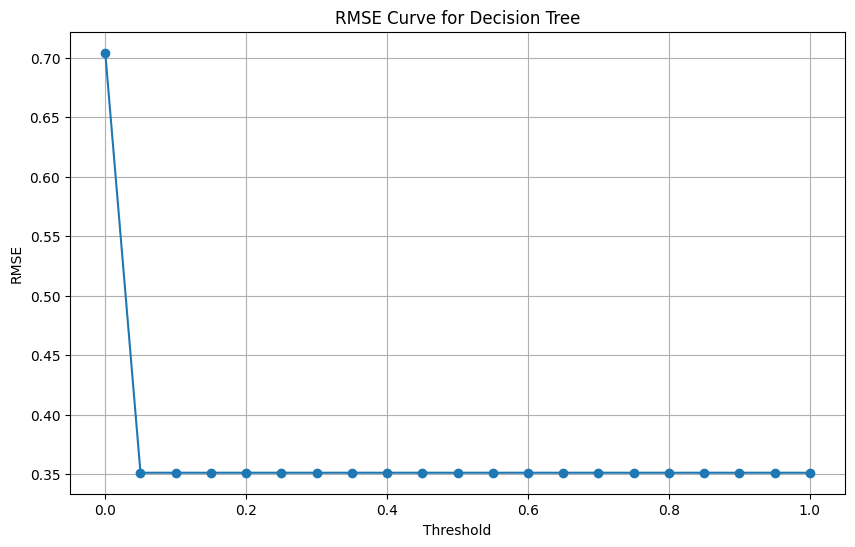

In [35]:
# Predict probabilities
y_prob = decision_tree_model.predict_proba(X_test)[:, 1]

# Define thresholds
thresholds = np.arange(0.0, 1.05, 0.05)
rmse_values = []

# Calculate RMSE for each threshold
for threshold in thresholds:
    y_pred_threshold = (y_prob >= threshold).astype(int)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_threshold))
    rmse_values.append(rmse)

# Plot RMSE curve
plt.figure(figsize=(10, 6))
plt.plot(thresholds, rmse_values, marker='o')
plt.title('RMSE Curve for Decision Tree')
plt.xlabel('Threshold')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()

Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
random_forest_model = RandomForestClassifier()

# Train the model
random_forest_model.fit(X_train, y_train)

# Make predictions
y_pred = random_forest_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
rf_report = classification_report(y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the results
print("Random Forest Model")
print("Accuracy:", accuracy)
print("Classification Report:\n", rf_report)
print("RMSE:", rmse)

Random Forest Model
Accuracy: 0.8991176470588236
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90      1687
           1       0.90      0.90      0.90      1713

    accuracy                           0.90      3400
   macro avg       0.90      0.90      0.90      3400
weighted avg       0.90      0.90      0.90      3400

RMSE: 0.31761982454056054


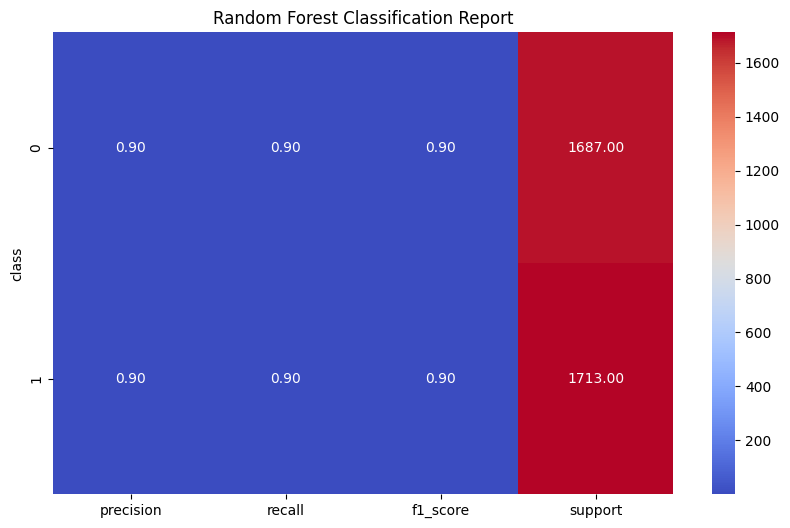

In [37]:
plot_classification_report(rf_report, 'Random Forest Classification Report')

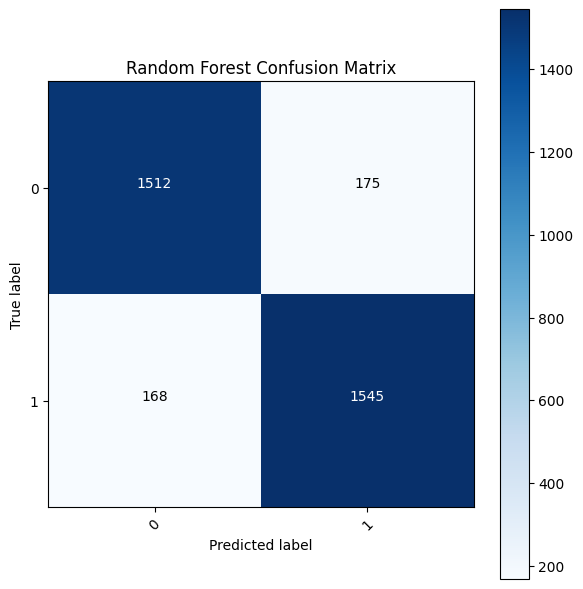

In [38]:
# Plotting the confusion matrix for Random Forest
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=[0, 1], title='Random Forest Confusion Matrix')

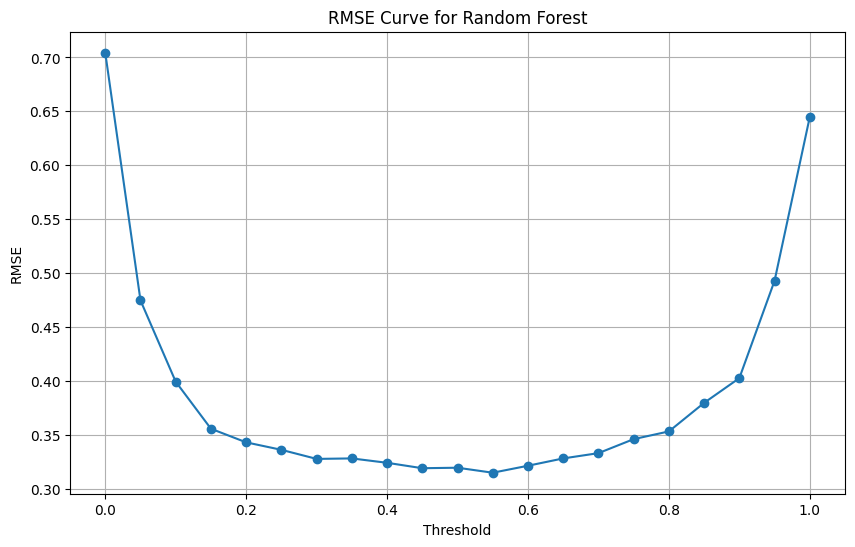

In [39]:
# Predict probabilities
y_prob = random_forest_model.predict_proba(X_test)[:, 1]

# Define thresholds
thresholds = np.arange(0.0, 1.05, 0.05)
rmse_values = []

# Calculate RMSE for each threshold
for threshold in thresholds:
    y_pred_threshold = (y_prob >= threshold).astype(int)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_threshold))
    rmse_values.append(rmse)

# Plot RMSE curve
plt.figure(figsize=(10, 6))
plt.plot(thresholds, rmse_values, marker='o')
plt.title('RMSE Curve for Random Forest')
plt.xlabel('Threshold')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()

SVM

In [40]:
from sklearn.svm import SVC

# Initialize the model with probability enabled
svm_model = SVC(probability=True)

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
svm_report = classification_report(y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the results
print("Support Vector Machine (SVM) Model")
print("Accuracy:", accuracy)
print("Classification Report:\n", svm_report)
print("RMSE:", rmse)

Support Vector Machine (SVM) Model
Accuracy: 0.8894117647058823
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.89      1687
           1       0.89      0.90      0.89      1713

    accuracy                           0.89      3400
   macro avg       0.89      0.89      0.89      3400
weighted avg       0.89      0.89      0.89      3400

RMSE: 0.33254809470829577


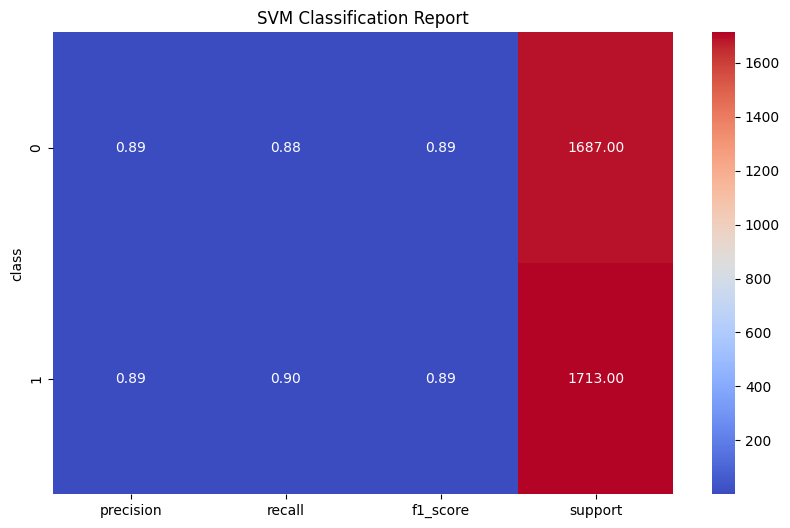

In [41]:
plot_classification_report(svm_report, 'SVM Classification Report')

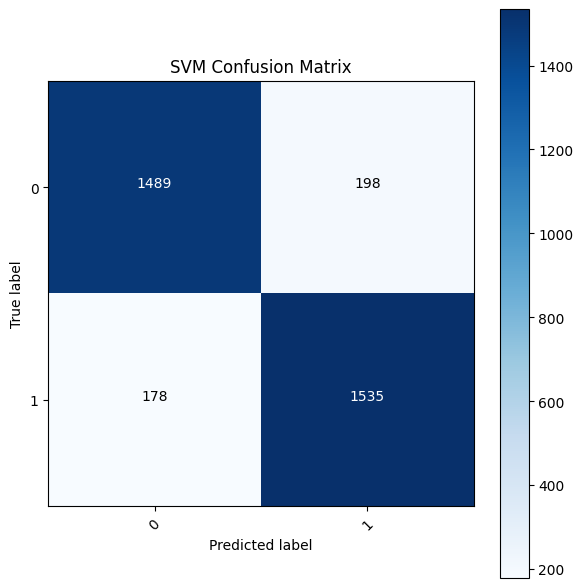

In [42]:
# Plotting the confusion matrix for SVM
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=[0, 1], title='SVM Confusion Matrix')

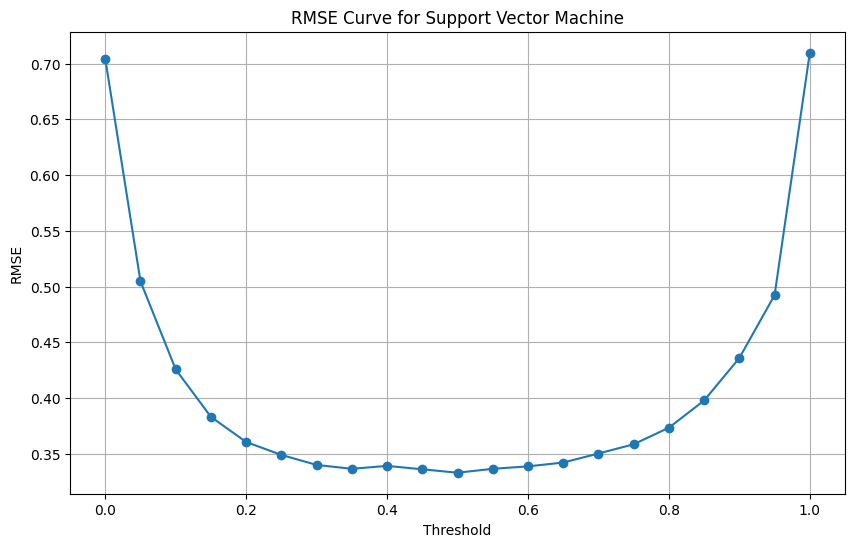

In [43]:
# Predict probabilities
y_prob = svm_model.predict_proba(X_test)[:, 1]

# Define thresholds
thresholds = np.arange(0.0, 1.05, 0.05)
rmse_values = []

# Calculate RMSE for each threshold
for threshold in thresholds:
    y_pred_threshold = (y_prob >= threshold).astype(int)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_threshold))
    rmse_values.append(rmse)

# Plot RMSE curve
plt.figure(figsize=(10, 6))
plt.plot(thresholds, rmse_values, marker='o')
plt.title('RMSE Curve for Support Vector Machine')
plt.xlabel('Threshold')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()

KNN

In [45]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the model
knn_model = KNeighborsClassifier()

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions
y_pred = knn_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
knn_report = classification_report(y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the results
print("K-Nearest Neighbors (KNN) Model")
print("Accuracy:", accuracy)
print("Classification Report:\n", knn_report)
print("RMSE:", rmse)

K-Nearest Neighbors (KNN) Model
Accuracy: 0.88
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.88      1687
           1       0.88      0.89      0.88      1713

    accuracy                           0.88      3400
   macro avg       0.88      0.88      0.88      3400
weighted avg       0.88      0.88      0.88      3400

RMSE: 0.34641016151377546


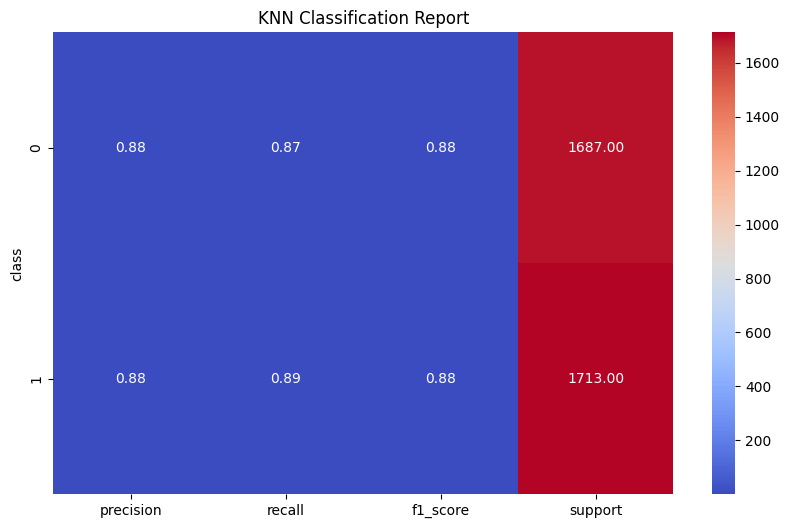

In [47]:
plot_classification_report(knn_report, 'KNN Classification Report')

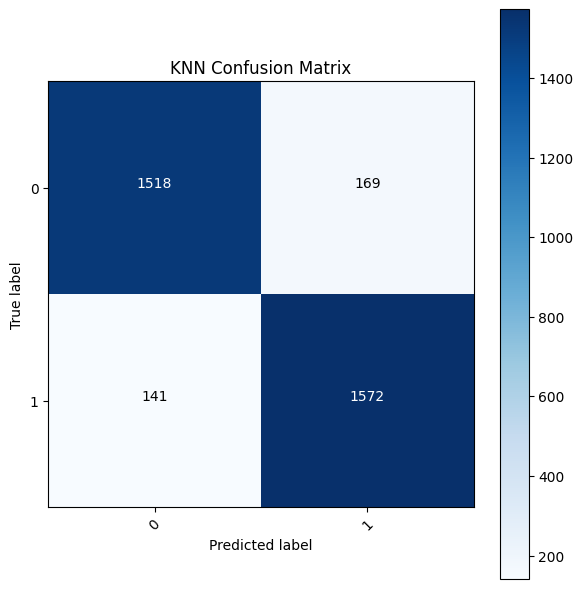

In [48]:
# Plotting the confusion matrix for KNN
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=[0, 1], title='KNN Confusion Matrix')

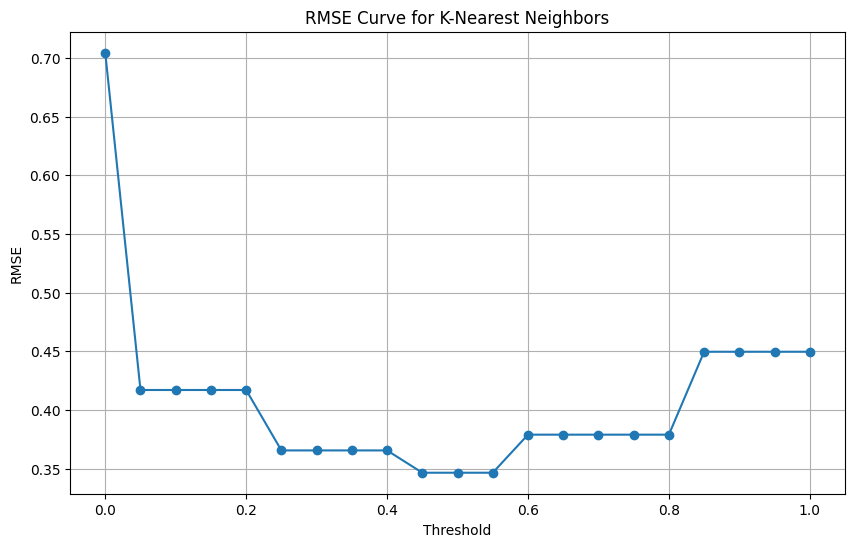

In [49]:
# Predict probabilities
y_prob = knn_model.predict_proba(X_test)[:, 1]

# Define thresholds
thresholds = np.arange(0.0, 1.05, 0.05)
rmse_values = []

# Calculate RMSE for each threshold
for threshold in thresholds:
    y_pred_threshold = (y_prob >= threshold).astype(int)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_threshold))
    rmse_values.append(rmse)

# Plot RMSE curve
plt.figure(figsize=(10, 6))
plt.plot(thresholds, rmse_values, marker='o')
plt.title('RMSE Curve for K-Nearest Neighbors')
plt.xlabel('Threshold')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()

Gradient Boosting classifier

In [50]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the model
gradient_boosting_model = GradientBoostingClassifier()

# Train the model
gradient_boosting_model.fit(X_train, y_train)

# Make predictions
y_pred = gradient_boosting_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
gb_report = classification_report(y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the results
print("Gradient Boosting Classifier Model")
print("Accuracy:", accuracy)
print("Classification Report:\n", gb_report)
print("RMSE:", rmse)

Gradient Boosting Classifier Model
Accuracy: 0.9088235294117647
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91      1687
           1       0.90      0.92      0.91      1713

    accuracy                           0.91      3400
   macro avg       0.91      0.91      0.91      3400
weighted avg       0.91      0.91      0.91      3400

RMSE: 0.30195441806377876


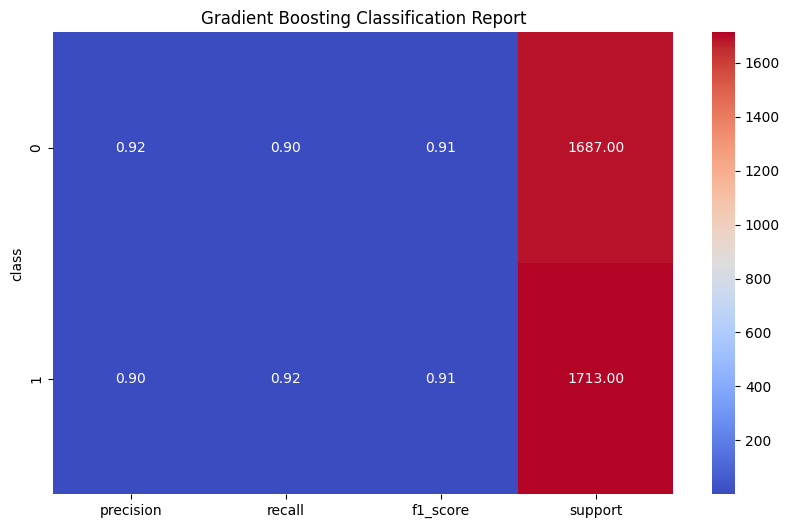

In [51]:
plot_classification_report(gb_report, 'Gradient Boosting Classification Report')

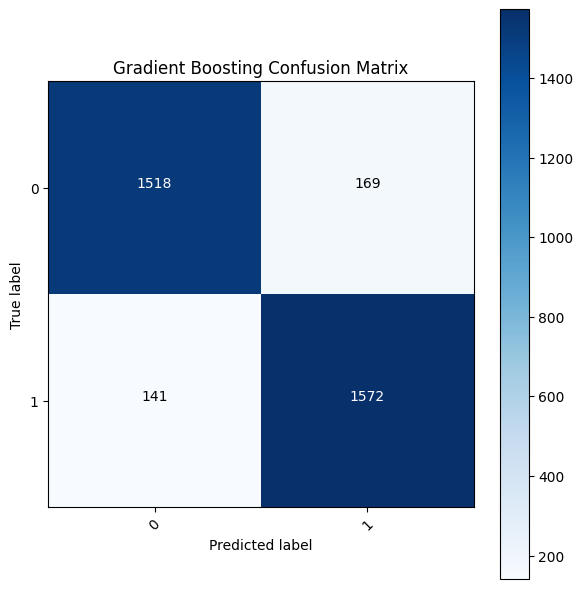

In [52]:
# Plotting the confusion matrix for Gradient Boosting
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=[0, 1], title='Gradient Boosting Confusion Matrix')

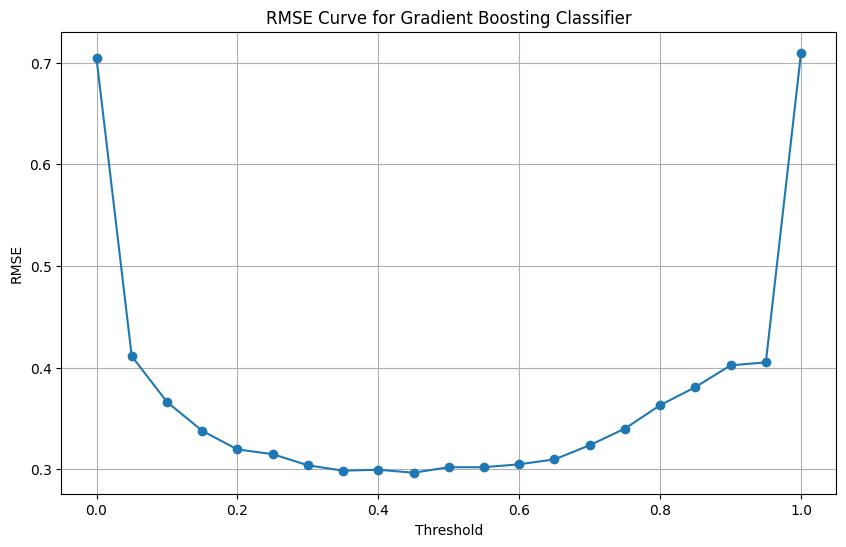

In [53]:
# Predict probabilities
y_prob = gradient_boosting_model.predict_proba(X_test)[:, 1]

# Define thresholds
thresholds = np.arange(0.0, 1.05, 0.05)
rmse_values = []

# Calculate RMSE for each threshold
for threshold in thresholds:
    y_pred_threshold = (y_prob >= threshold).astype(int)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_threshold))
    rmse_values.append(rmse)

# Plot RMSE curve
plt.figure(figsize=(10, 6))
plt.plot(thresholds, rmse_values, marker='o')
plt.title('RMSE Curve for Gradient Boosting Classifier')
plt.xlabel('Threshold')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()

Artificial Neural Networks (ANN)

In [54]:
pip install numpy pandas scikit-learn keras tensorflow matplotlib

In [55]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import classification_report, accuracy_score

# Ensure reproducibility
np.random.seed(42)

# Define the ANN model
ann_model = Sequential()
ann_model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
ann_model.add(Dense(units=32, activation='relu'))
ann_model.add(Dense(units=16, activation='relu'))
ann_model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
ann_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Make predictions
y_pred = (ann_model.predict(X_test) > 0.5).astype("int32")

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
ann_report = classification_report(y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the results
print("Artificial Neural Network (ANN) Model")
print("Accuracy:", accuracy)
print("Classification Report:\n", ann_report)
print("RMSE:", rmse)

Epoch 1/50
340/340 [==============================] - 5s 8ms/step - loss: 0.3241 - accuracy: 0.8562 - val_loss: 0.2655 - val_accuracy: 0.8813
Epoch 2/50
340/340 [==============================] - 2s 6ms/step - loss: 0.2517 - accuracy: 0.8877 - val_loss: 0.2611 - val_accuracy: 0.8853
Epoch 3/50
340/340 [==============================] - 2s 5ms/step - loss: 0.2462 - accuracy: 0.8886 - val_loss: 0.2626 - val_accuracy: 0.8724
Epoch 4/50
340/340 [==============================] - 3s 9ms/step - loss: 0.2425 - accuracy: 0.8907 - val_loss: 0.2534 - val_accuracy: 0.8805
Epoch 5/50
340/340 [==============================] - 2s 7ms/step - loss: 0.2368 - accuracy: 0.8918 - val_loss: 0.2516 - val_accuracy: 0.8879
Epoch 6/50
340/340 [==============================] - 2s 5ms/step - loss: 0.2313 - accuracy: 0.8925 - val_loss: 0.2416 - val_accuracy: 0.8849
Epoch 7/50
340/340 [==============================] - 2s 6ms/step - loss: 0.2213 - accuracy: 0.8972 - val_loss: 0.2291 - val_accuracy: 0.8930
Epoch 

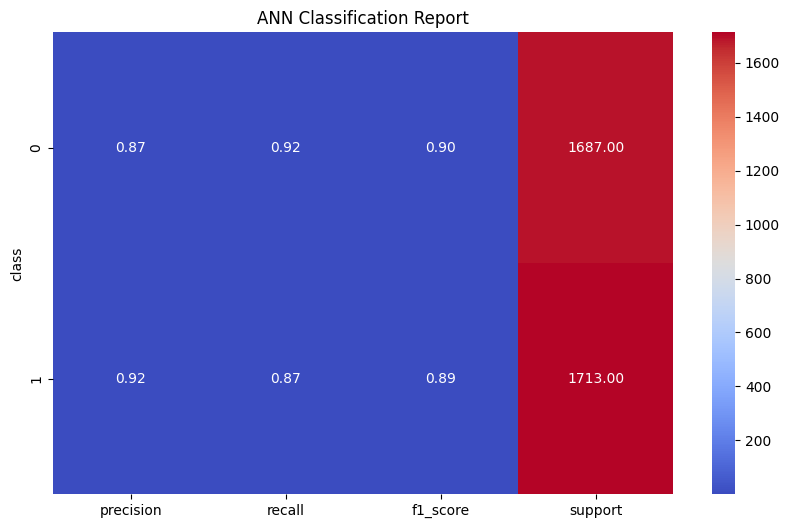

In [56]:
plot_classification_report(ann_report, 'ANN Classification Report')

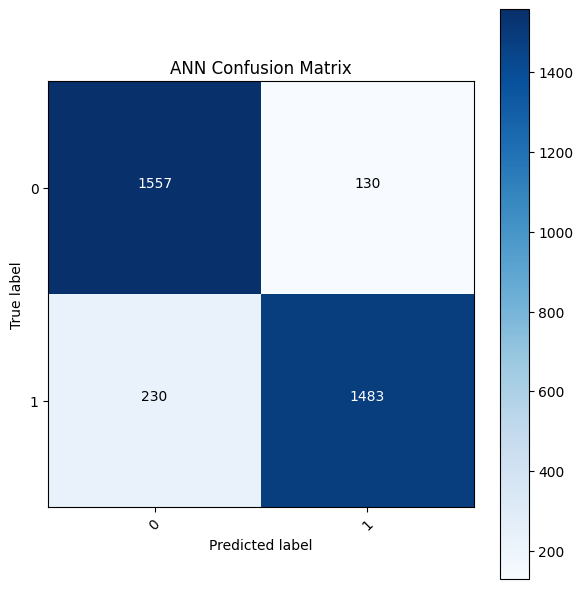

In [57]:
# Plotting the confusion matrix for ANN
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=[0, 1], title='ANN Confusion Matrix')

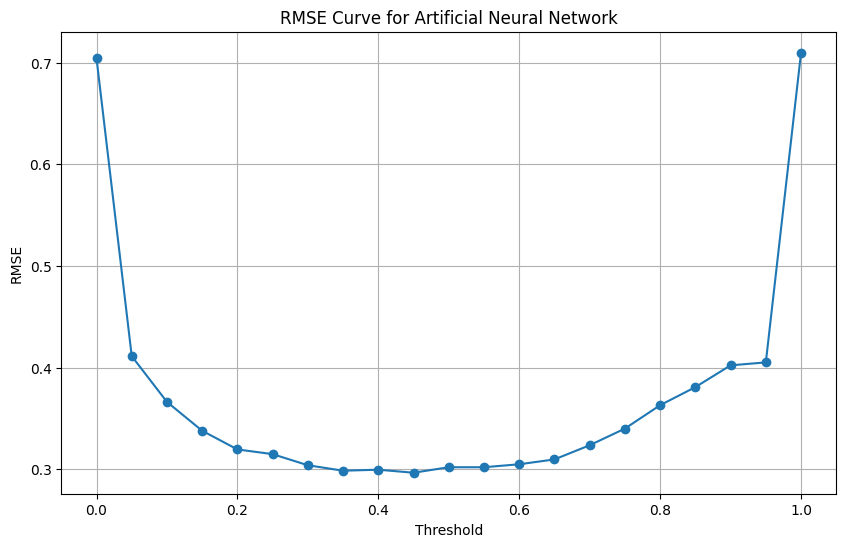

In [58]:
# Define thresholds
thresholds = np.arange(0.0, 1.05, 0.05)
rmse_values = []

# Calculate RMSE for each threshold
for threshold in thresholds:
    y_pred_threshold = (y_prob >= threshold).astype(int)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_threshold))
    rmse_values.append(rmse)

# Plot RMSE curve
plt.figure(figsize=(10, 6))
plt.plot(thresholds, rmse_values, marker='o')
plt.title('RMSE Curve for Artificial Neural Network')
plt.xlabel('Threshold')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()

Convolutional Neural Networks (CNN)

In [59]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D
from sklearn.metrics import classification_report, accuracy_score

# Ensure reproducibility
np.random.seed(42)

# Reshape data to fit into the CNN
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the CNN model
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(units=64, activation='relu'))
cnn_model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
cnn_model.fit(X_train_cnn, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Make predictions
y_pred = (cnn_model.predict(X_test_cnn) > 0.5).astype("int32")

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
cnn_report = classification_report(y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the results
print("Convolutional Neural Network (CNN) Model")
print("Accuracy:", accuracy)
print("Classification Report:\n", cnn_report)
print("RMSE:", rmse)

Epoch 1/50
340/340 [==============================] - 2s 4ms/step - loss: 0.2780 - accuracy: 0.8780 - val_loss: 0.2556 - val_accuracy: 0.8864
Epoch 2/50
340/340 [==============================] - 1s 3ms/step - loss: 0.2360 - accuracy: 0.8923 - val_loss: 0.2333 - val_accuracy: 0.8868
Epoch 3/50
340/340 [==============================] - 1s 3ms/step - loss: 0.2203 - accuracy: 0.8949 - val_loss: 0.2228 - val_accuracy: 0.8952
Epoch 4/50
340/340 [==============================] - 2s 5ms/step - loss: 0.2142 - accuracy: 0.8971 - val_loss: 0.2265 - val_accuracy: 0.8908
Epoch 5/50
340/340 [==============================] - 2s 5ms/step - loss: 0.2138 - accuracy: 0.8984 - val_loss: 0.2206 - val_accuracy: 0.8967
Epoch 6/50
340/340 [==============================] - 1s 4ms/step - loss: 0.2068 - accuracy: 0.9003 - val_loss: 0.2231 - val_accuracy: 0.8868
Epoch 7/50
340/340 [==============================] - 1s 3ms/step - loss: 0.2058 - accuracy: 0.9014 - val_loss: 0.2200 - val_accuracy: 0.8897
Epoch 

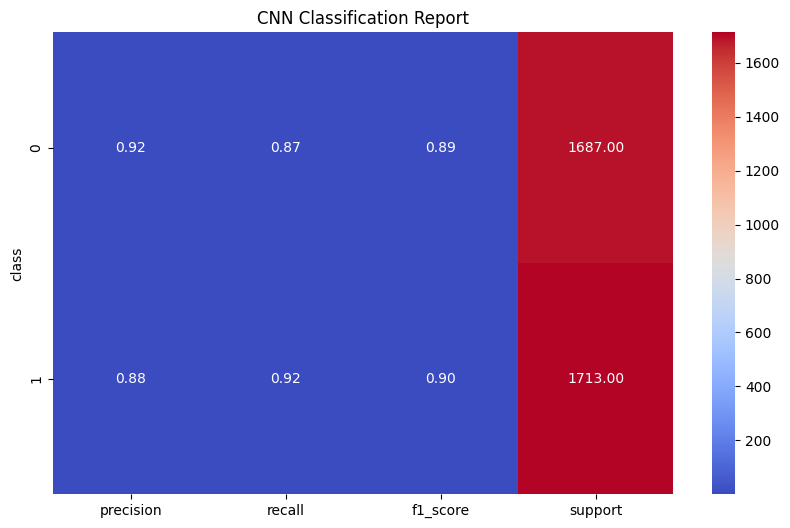

In [60]:
plot_classification_report(cnn_report, 'CNN Classification Report')

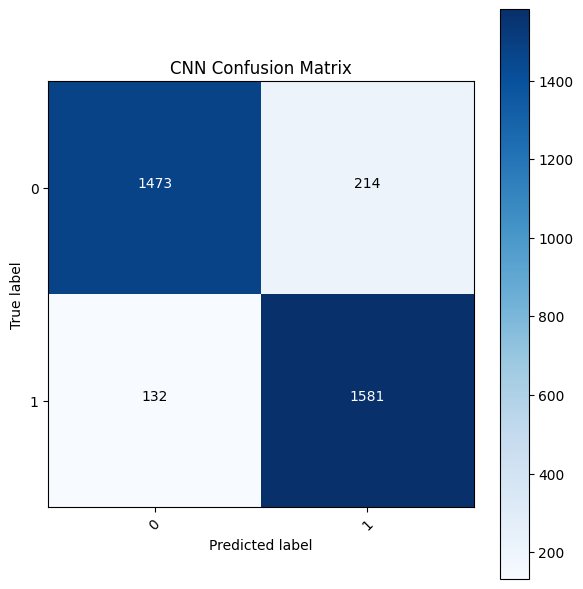

In [61]:
# Plotting the confusion matrix for CNN
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=[0, 1], title='CNN Confusion Matrix')

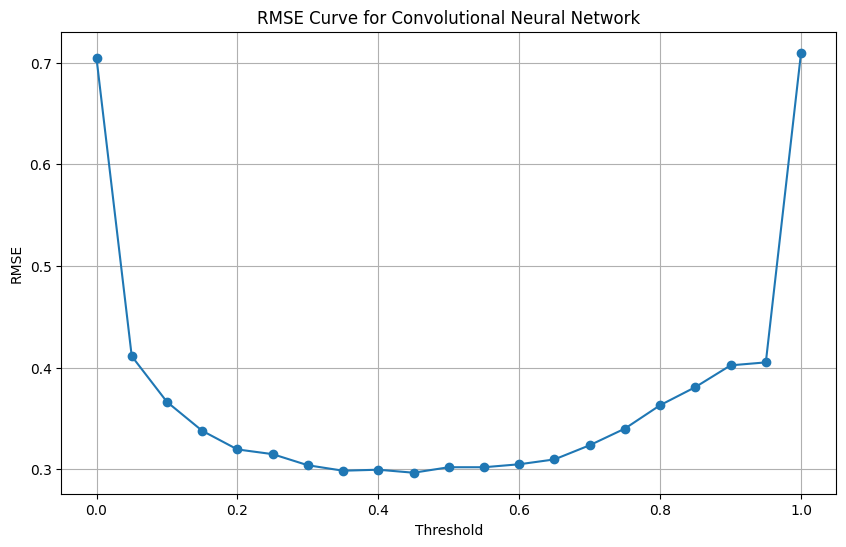

In [62]:
# Define thresholds
thresholds = np.arange(0.0, 1.05, 0.05)
rmse_values = []

# Calculate RMSE for each threshold
for threshold in thresholds:
    y_pred_threshold = (y_prob >= threshold).astype(int)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_threshold))
    rmse_values.append(rmse)

# Plot RMSE curve
plt.figure(figsize=(10, 6))
plt.plot(thresholds, rmse_values, marker='o')
plt.title('RMSE Curve for Convolutional Neural Network')
plt.xlabel('Threshold')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()

Hyperparameter Tuning with RandomizedSearchCV

Gradient Boosting Hyperparameter Tuning with RandomizedSearchCV

In [63]:
import warnings
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib

# Suppress warnings for clean output
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Define the model
gb = GradientBoostingClassifier()

# Define the parameters to search
gb_params = {
    'n_estimators': [50, 100, 200, 400],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use the loky backend for parallel processing
with joblib.parallel_backend('loky'):
    # Initialize RandomizedSearchCV
    gb_random = RandomizedSearchCV(gb, gb_params, n_iter=50, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)

    # Fit RandomizedSearchCV
    gb_random.fit(X_train, y_train)

# Best parameters and score
best_gb = gb_random.best_estimator_
gb_best_params = gb_random.best_params_
gb_best_score = gb_random.best_score_

# Evaluate on test data
y_pred = best_gb.predict(X_test)
gb_accuracy = accuracy_score(y_test, y_pred)
gb_report = classification_report(y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Best Gradient Boosting Model")
print("Best Parameters:", gb_best_params)
print("Best Cross-Validation Score:", gb_best_score)
print("Test Accuracy:", gb_accuracy)
print("Classification Report:\n", gb_report)
print("RMSE:", rmse)

Best Gradient Boosting Model
Best Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 3, 'learning_rate': 0.1}
Best Cross-Validation Score: 0.9148529411764705
Test Accuracy: 0.91
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91      1687
           1       0.90      0.92      0.91      1713

    accuracy                           0.91      3400
   macro avg       0.91      0.91      0.91      3400
weighted avg       0.91      0.91      0.91      3400

RMSE: 0.3


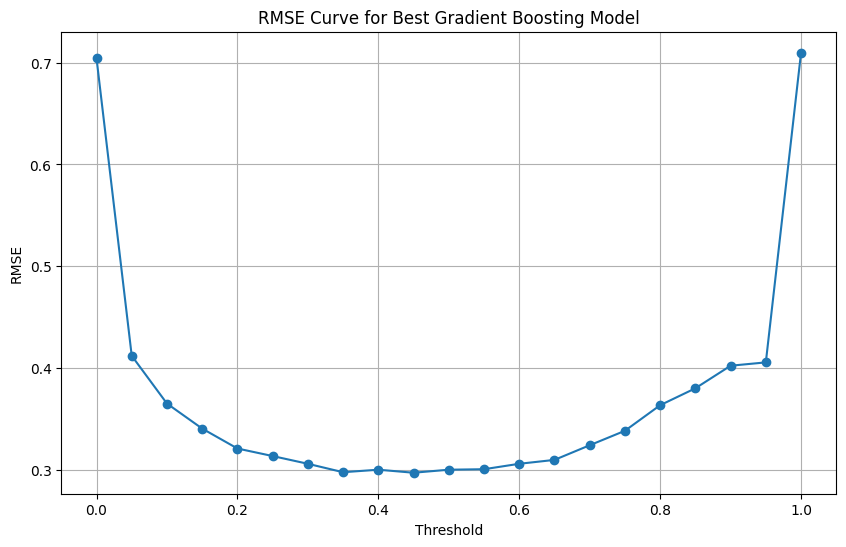

In [64]:
# Predict probabilities using the best model
y_prob = best_gb.predict_proba(X_test)[:, 1]

# Define thresholds
thresholds = np.arange(0.0, 1.05, 0.05)
rmse_values = []

# Calculate RMSE for each threshold
for threshold in thresholds:
    y_pred_threshold = (y_prob >= threshold).astype(int)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_threshold))
    rmse_values.append(rmse)

# Plot RMSE curve
plt.figure(figsize=(10, 6))
plt.plot(thresholds, rmse_values, marker='o')
plt.title('RMSE Curve for Best Gradient Boosting Model')
plt.xlabel('Threshold')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()

**Result**

The overall accuracy of the model achieved by each classifier—Logistic Regression, Decision Tree, Random ForestClassifier, SVM, K-Nearest Neighbors, Gradient Boosting classifier, ANN, CNN, Gradient Boosting Hyperparameter Tuning with RandomizedSearchCV —is as follows: 89.02%, 87.67%, 89.91%, 88.94%, 88%, 90.88%, 89.41%, 89.82%, 91.48% respectively. Among the four classifiers, the Gradient Boosting classifier is achieved the highest overall accuracy of 91.48%

The RMSE value of the model achieved by each classifier—Logistic Regression, Decision Tree, Random ForestClassifier, SVM, K-Nearest Neighbors, Gradient Boosting classifier, ANN, CNN, Gradient Boosting Hyperparameter Tuning with RandomizedSearchCV —is as follows: 0.3312, 0.3510, 0.3176, 0.3325, 0.3464, 0.3019, 0.3253, 0.3190, 0.3 respectively. Among the four classifiers, the Gradient Boosting classifier is achieved the less RMSE value of 0.3